In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import rpy2.rinterface_lib.callbacks
import logging
import scrublet as scr
from rpy2.robjects import pandas2ri
import anndata2ri


In [2]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.5 scipy==1.6.3 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0


In [3]:
%%R
# Load libraries from correct lib Paths for my environment - ignore this!
.libPaths("/home/spuccio/anaconda3/envs/singlecell/lib/R/library/")

library(clustree)




In [4]:
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
#adata = sc.read_h5ad("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/DESC_obj_CD4_dirty.h5ad")

In [6]:
adata =sc.read_h5ad("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/CD4_after_DESC_clean.h5ad")

In [12]:
adata.X

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:32)


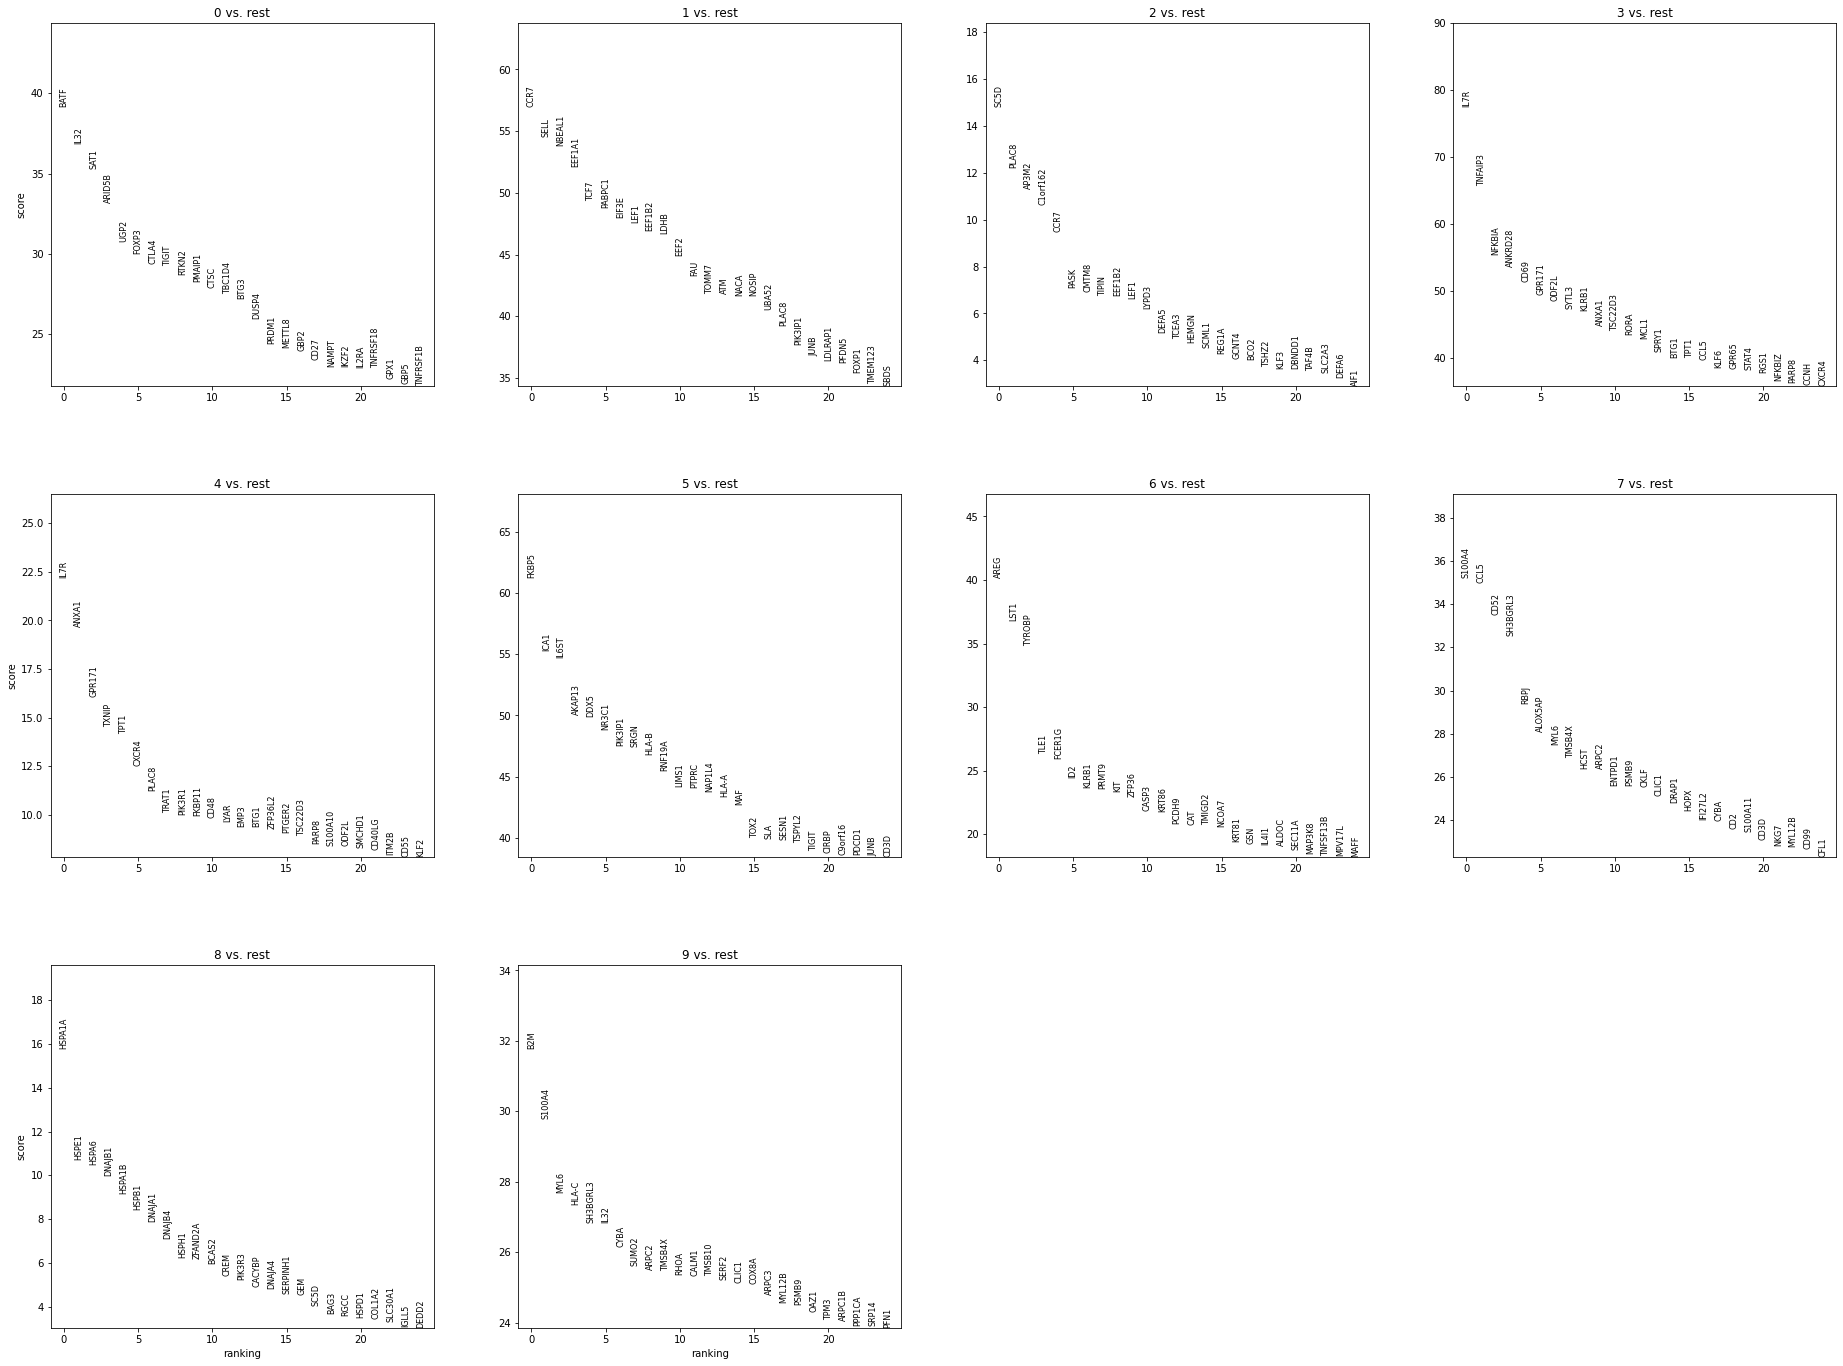

In [14]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.tl.rank_genes_groups(adata, 'desc_0.6', method='t-test',use_raw=True)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

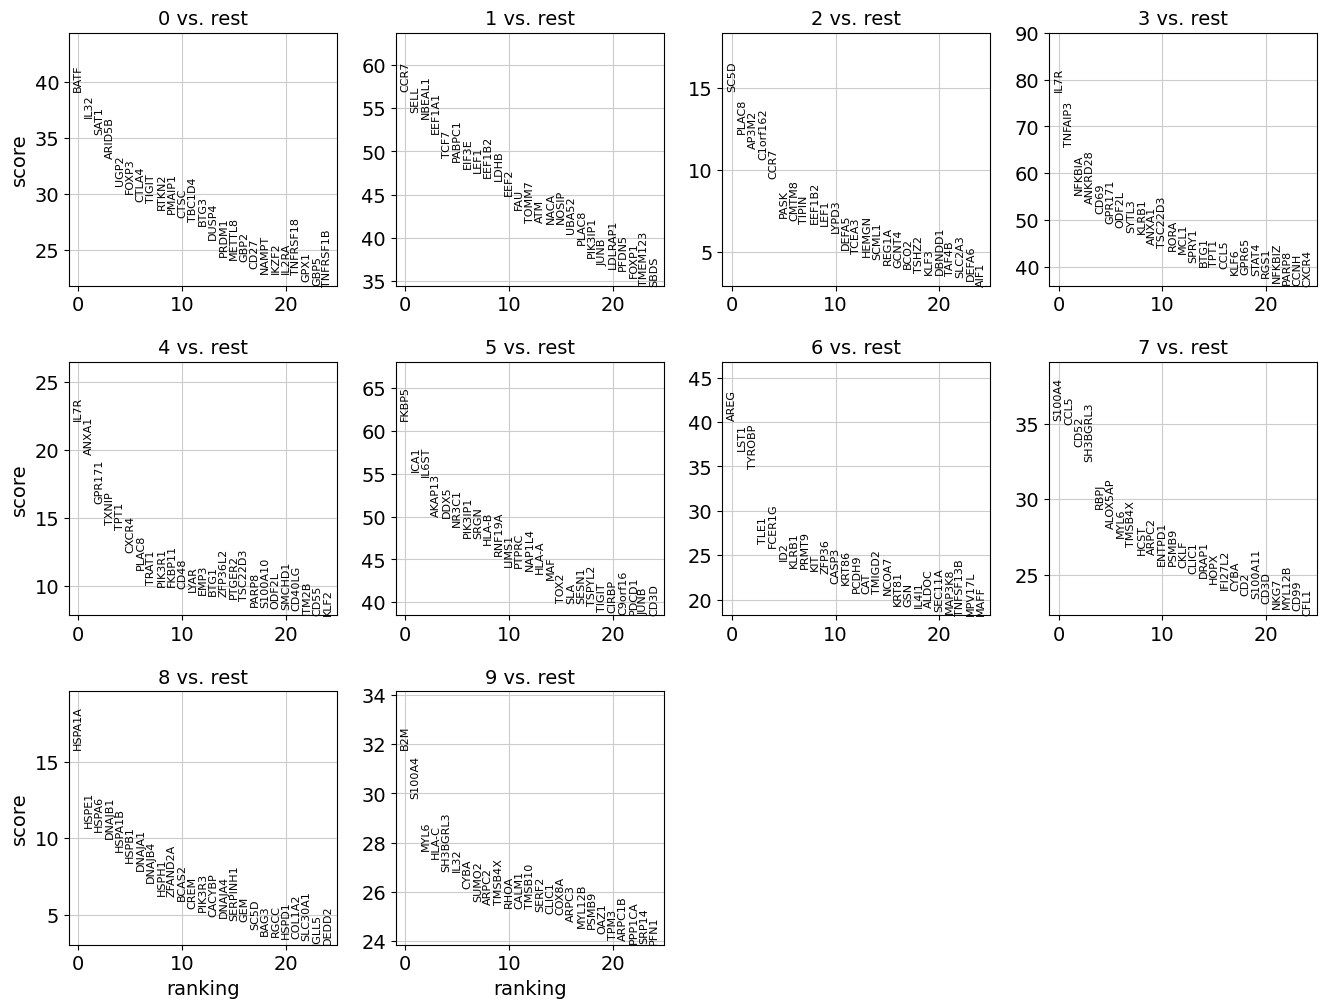

In [18]:
result = adata.uns['rank_genes_groups']

In [19]:
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:]: result[key][group]
    for group in groups for key in ['names','pvals','pvals_adj','logfoldchanges']}).to_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/CD4_res06_DEGS_beforeMAGIC.csv",header=True,index=False)

In [20]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [21]:
sc.pp.sqrt(adata)

In [26]:
import scanpy.external as sce
adata_magic = sce.pp.magic(adata[:, adata[:,].to_df().sum(axis=0) > 0.01], name_list="all_genes", knn=5,copy=True,n_jobs=20)

computing MAGIC


  Running MAGIC with `solver='exact'` on 15747-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


    finished (0:06:49)


In [31]:
adata_magic.raw = adata_magic

In [48]:
#pd.DataFrame(adata_magic.X,index=adata_magic.obs.index,columns=adata_magic.var.index).round(2).to_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/CD4_magic_imputed.tsv",sep="\t",header=True,index=True)


In [47]:
pd.DataFrame(adata.X,index=adata.obs.index,columns=adata.var.index).pow(2).round(3).to_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/CD4_magic_imputed.tsv",sep="\t",header=True,index=True)


In [37]:
#a = np.power(pd.DataFrame(adata.X,index=adata.obs.index,columns=adata.var.index), 2)

In [36]:
#a.round(2)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:31)


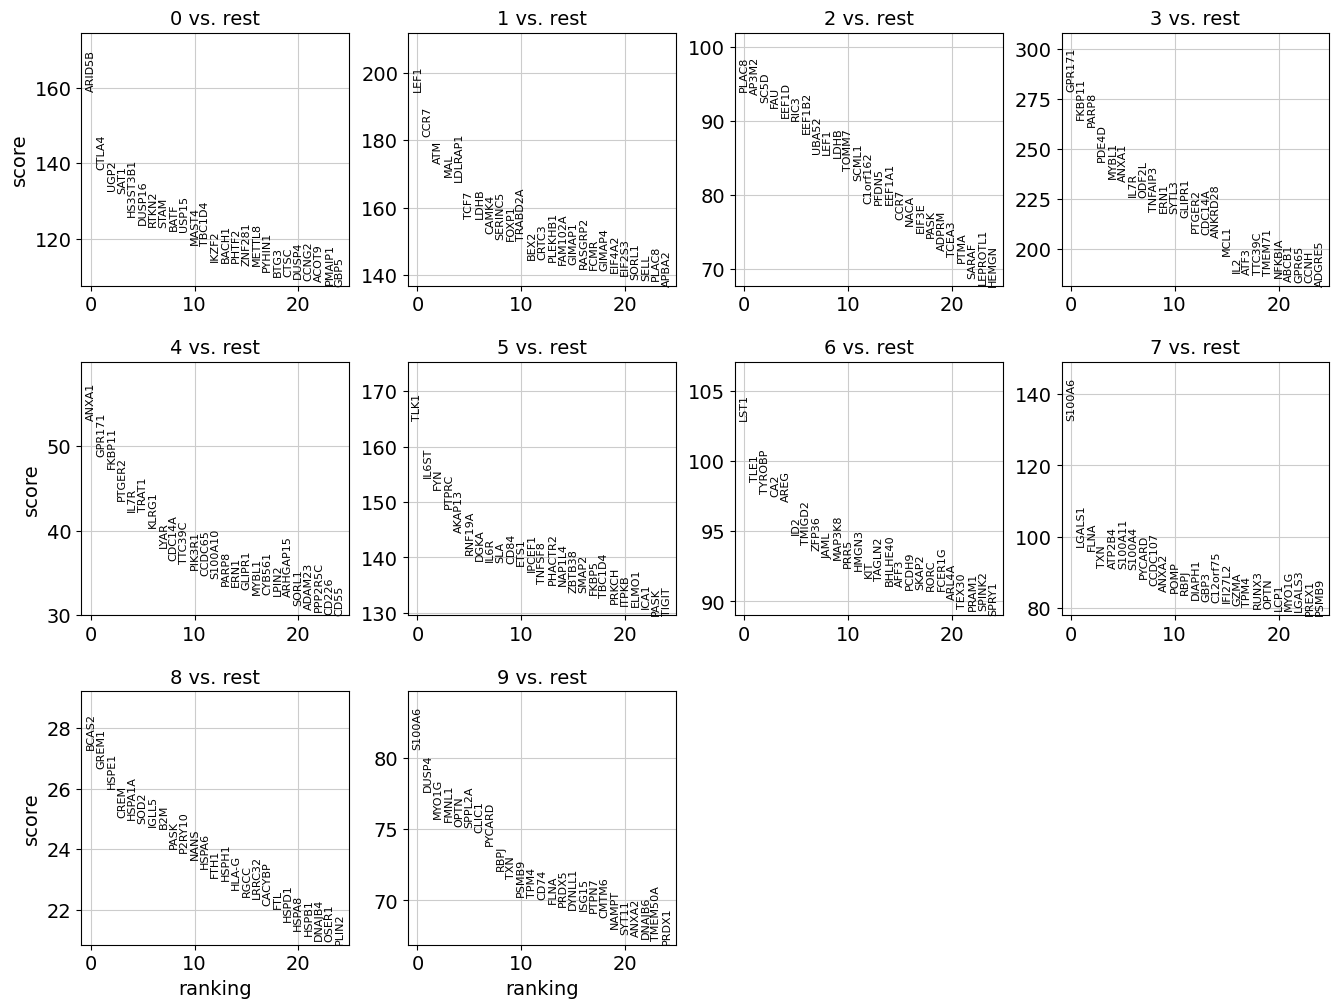

In [34]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.tl.rank_genes_groups(adata_magic, 'desc_0.6', method='t-test',use_raw=True)
sc.pl.rank_genes_groups(adata_magic, n_genes=25, sharey=False)

In [37]:
result = adata_magic.uns['rank_genes_groups']

In [38]:
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:]: result[key][group]
    for group in groups for key in ['names','pvals','pvals_adj','logfoldchanges']}).to_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/CD4_res06_DEGS_afterMAGIC.csv",header=True,index=False)

In [40]:
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:]: result[key][group]
    for group in groups for key in ['names','pvals','pvals_adj','logfoldchanges']})

,0_names,0_pvals,0_pvals_adj,0_logfoldchanges,1_names,1_pvals,1_pvals_adj,1_logfoldchanges,2_names,2_pvals,...,7_pvals_adj,7_logfoldchanges,8_names,8_pvals,8_pvals_adj,8_logfoldchanges,9_names,9_pvals,9_pvals_adj,9_logfoldchanges
0,ARID5B,0.0,0.0,1.938904,LEF1,0.0,0.0,2.352484,PLAC8,0.0,...,0.0,4.223062,BCAS2,1.340546e-143,4.592033e-143,0.641206,S100A6,0.0,0.0,3.473944
1,CTLA4,0.0,0.0,2.144980,CCR7,0.0,0.0,3.147313,AP3M2,0.0,...,0.0,3.437919,GREM1,4.880055e-138,1.605982e-137,0.854627,DUSP4,0.0,0.0,2.488453
2,UGP2,0.0,0.0,1.491244,ATM,0.0,0.0,1.607873,SC5D,0.0,...,0.0,1.635757,HSPE1,6.968672e-132,2.196031e-131,1.129163,MYO1G,0.0,0.0,1.705312
3,SAT1,0.0,0.0,2.714801,MAL,0.0,0.0,1.618791,FAU,0.0,...,0.0,1.749136,CREM,4.134541e-124,1.231447e-123,1.090308,FMNL1,0.0,0.0,1.265655
4,HS3ST3B1,0.0,0.0,1.619478,LDLRAP1,0.0,0.0,2.175978,EEF1D,0.0,...,0.0,1.292194,HSPA1A,1.190944e-122,3.508006e-122,2.395468,OPTN,0.0,0.0,1.396533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15742,CHD7,0.0,0.0,-1.961447,PHLDA1,0.0,0.0,-2.214579,CKLF,0.0,...,0.0,-2.227270,GATAD2B,0.000000e+00,0.000000e+00,-0.793788,ZSCAN18,0.0,0.0,-1.731338
15743,PLAC8,0.0,0.0,-2.462172,PTPN22,0.0,0.0,-1.353903,PPP2R2B,0.0,...,0.0,-2.971123,ARID1A,0.000000e+00,0.000000e+00,-0.827434,DBNDD1,0.0,0.0,-3.385884
15744,NUCB2,0.0,0.0,-1.735176,FRMD4B,0.0,0.0,-1.861278,LDLRAD4,0.0,...,0.0,-1.242462,NPIPB5,0.000000e+00,0.000000e+00,-0.866929,APBA2,0.0,0.0,-2.646124
15745,RBMS1,0.0,0.0,-1.653576,RHOC,0.0,0.0,-1.708406,SLC7A5,0.0,...,0.0,-2.811095,CD8A,0.000000e+00,0.000000e+00,-1.502324,TXK,0.0,0.0,-2.374456


In [41]:
adata_magic.uns['rank_genes_groups']

{'params': {'groupby': 'desc_0.6',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('ARID5B', 'LEF1', 'PLAC8', 'GPR171', 'ANXA1', 'TLK1', 'LST1', 'S100A6', 'BCAS2', 'S100A6'),
            ('CTLA4', 'CCR7', 'AP3M2', 'FKBP11', 'GPR171', 'IL6ST', 'TLE1', 'LGALS1', 'GREM1', 'DUSP4'),
            ('UGP2', 'ATM', 'SC5D', 'PARP8', 'FKBP11', 'FYN', 'TYROBP', 'FLNA', 'HSPE1', 'MYO1G'),
            ...,
            ('NUCB2', 'FRMD4B', 'LDLRAD4', 'TIAM1', 'TIGIT', 'GPR65', 'TSPAN14', 'BEX4', 'NPIPB5', 'APBA2'),
            ('RBMS1', 'RHOC', 'SLC7A5', 'TSHZ2', 'TOX2', 'HPGD', 'ATXN7L1', 'GCNT4', 'CD8A', 'TXK'),
            ('SCML4', 'AKIRIN2', 'MAN1A1', 'CD27', 'MAGEH1', 'CD55', 'TBC1D4', 'TXK', 'RC3H1', 'PLAC8')],
           dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O'), ('8', 'O'), ('9', 'O')]),
 'scores': rec.array([( 159.06204,  194.54463,   94.0